In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Bhavesh\OneDrive - Shri Vile Parle Kelavani Mandal\Documents\Data_Analyst_Projects\Machine_Learning\Spam_Message_Classifier\data\spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df['label_num'] = df['label'].map({'ham':0, 'spam':1})

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words = 'english')

X_train_vc = vectorizer.fit_transform(X_train)
X_test_vc = vectorizer.transform(X_test)

In [5]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vc, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

y_pred = model.predict(X_test_vc)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score :  0.9838565022421525

Confusion Matrix : 
 [[959   6]
 [ 12 138]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



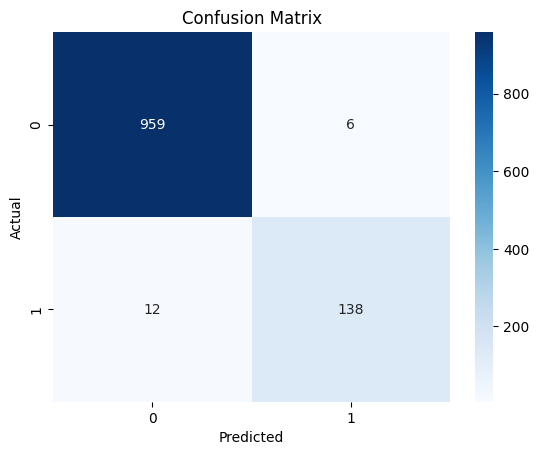

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [8]:
msg = ['Congratulations! You have won a lottery now buy one smartphone and get one free.']
msg_vc = vectorizer.transform(msg)

print("Spam Probability : ", model.predict_proba(msg_vc))
print("Prediction : ", model.predict(msg_vc))

Spam Probability :  [[0.04565575 0.95434425]]
Prediction :  [1]


## How This Model Works

- The model looks at words in a message
- Certain words appear more often in spam
- The model calculates probabilities
- The class with higher probability is chosen

In [9]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
log_probs = model.feature_log_prob_

spam_words = np.argsort(log_probs[1])[-10:]
ham_words = np.argsort(log_probs[0])[-10:]

print("Top Spam indicators : ")
for i in spam_words:
    print(feature_names[i])

print("\nTop Ham indicators : ")
for i in ham_words: 
    print(feature_names[i])

Top Spam indicators : 
prize
www
reply
text
claim
stop
mobile
ur
txt
free

Top Ham indicators : 
know
come
good
got
ur
ll
just
ok
gt
lt


## Model Interpretation

The model identifies spam by learning word patterns.

Examples:
- Words like "free", "claim", "prize", "www" strongly indicate spam
- Normal conversational words indicate ham

This makes the model interpretable and trustworthy.
